---
tags:
- PyIntro
- Leetcode
---

# Python数据结构练习

Python内置了很多的数据类型：

- 字符串（string）
- 布尔值（bool）
- 列表（list）
- 元组（tuple）
- 集合（set）
- 整数（int）
- 浮点数（float）
- 复数（complex）
- 字典（dict）

字符串、列表、字典可能是大家最熟悉的，它们真的太常用了。各种运算、方法用的飞起。

但是集合、整数、元组也很有用，尤其是刷Leetcode的时候（集合怎么做运算真的很容易忘！）。

所以特地整理了这一篇，算是给自己的一个Cheating Sheet，希望也能帮到你～

In [1]:
!python -V

Python 3.12.11


## 字符串

字符串是最常用的数据类型了。它的方法大家也比较熟悉，快速过一下。

### 魔法方法

<details>
  <summary>str的魔法方法</summary>

```
__add__
__class__
__contains__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getnewargs__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__mod__
__mul__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__rmod__
__rmul__
__setattr__
__sizeof__
__str__
__subclasshook__
```

</details>

字符串魔法方法就不再一个一个介绍，本站有专门的文章介绍了魔法方法的用法，它们定义了字符串的各种运算：

In [2]:
"a" in "abc", "apple" < "orange", "a" * 3, "a" + "B", "A""B" # 两个字符串连写，这也是合法的

(True, True, 'aaa', 'aB', 'AB')

str是一种immutable的类型，所以是hashable的

In [3]:
"apple"[1] = "c" # 不可以进行原地修改

TypeError: 'str' object does not support item assignment

In [4]:
hash("a") # 可以计算hash值

-5257681223383882104

### 大小写转换

In [5]:
# ß是德语中的字母，通常可以和ss互用
(
    "ß".lower(),
    "ß".upper(),
    "ß".casefold(),
    "apple".capitalize(),
    "Apple".swapcase(),
    "attention is all your need".title(),
)

('ß', 'SS', 'ss', 'Apple', 'aPPLE', 'Attention Is All Your Need')

### 格式化

In [6]:
# 左右填充对齐
"a".center(5, "-"), "a".ljust(5, "-"), "a".rjust(5, "-"), "1".zfill(3)

('--a--', 'a----', '----a', '001')

In [7]:
# 去除左右两侧的空白字符
" a \n".strip(), " a \n".lstrip(), " a \n".rstrip()

('a', 'a \n', ' a')

In [8]:
# 填空
"{}+{}={res}".format(1, 1, res=2), "{left}={right}".format_map({"left": 1, "right": 2})

('1+1=2', '1=2')

In [9]:
"-".join("apple")

'a-p-p-l-e'

### 修改字符串

In [10]:
# maketrans是静态方法，生成一个字典用来给translate用
str.maketrans({"a": "b", "p": "l", "l": "c"})

{97: 'b', 112: 'l', 108: 'c'}

In [11]:
"apple".translate({97: "b", 112: "l", 108: "c"})

'bllce'

In [12]:
# 杂七杂八的
(
    "我！".encode(),
    "a\tb".expandtabs(tabsize=4),
    "apple".replace("p", "q"),
    "subset".removeprefix("sub"), # 这两个方法比较新，Python 3.9引入
    "subset".removesuffix("set"),
)

(b'\xe6\x88\x91\xef\xbc\x81', 'a   b', 'aqqle', 'set', 'sub')

In [13]:
# 拆分字符串
(
    "1\n2\n3".splitlines(keepends=True),
    "apple".split("p", maxsplit=1),
    "apple".rsplit("p", maxsplit=1),
    "apple".partition("p"),
    "apple".rpartition("p"),
)

(['1\n', '2\n', '3'],
 ['a', 'ple'],
 ['ap', 'le'],
 ('a', 'p', 'ple'),
 ('ap', 'p', 'le'))

### 遍历字符串

In [14]:
(
    "apple".count("p"),
    "apple".index("p"),
    "apple".rindex("p"),
    "apple".find("o", 1, 3),  # 没找到的话返回-1，不会报错，还可以指定查找区间
    "apple".rfind("p"),
)

(2, 1, 2, -1, 2)

### 逻辑判断

In [15]:
# 开头结尾判断
"Apple".startswith("A"), "Apple".endswith("e")

(True, True)

In [16]:
# 大小写判断
(
    "Apple Juice".istitle(),
    "apple".islower(),
    "APPLE".isupper(),
)

(True, True, True)

In [17]:
"\t\n\r\v".isspace(), "Apple\r".isprintable() # 不可见字符不可打印（物理意义上打印机不可见）

(True, False)

In [18]:
# 数字内容判断
(
    "02".isdecimal(),    # 必须是纯0-9数字
    "3²".isdigit(),      # 可以包含一些特殊字符，例如上标²
    "Ⅷ五¾".isnumeric(),  # 包含更多数值类型的字符串，甚至中文数字、罗马数字
)

(True, True, True)

In [19]:
(
    "&*^".isascii(),
    "continue".isidentifier(),  # 判断是不是Python关键字
    "Apple23".isalnum(),  # 数字+字母
    "我喜欢Appleです".isalpha(),  # 数字+字母，所有unicode字母，不仅仅是英文字母
)

(True, True, True, True)

## 布尔

布尔类型比较简单。

In [20]:
bool.__mro__
# 可以看到，bool是int的子类，因此可以做很多数值运算
# 它的魔法方法几乎都是从int继承过来的

(bool, int, object)

<details>
  <summary>bool的魔法方法</summary>

```
__abs__
__add__
__and__
__bool__
__ceil__
__class__
__delattr__
__dir__
__divmod__
__doc__
__eq__
__float__
__floor__
__floordiv__
__format__
__ge__
__getattribute__
__getnewargs__
__getstate__
__gt__
__hash__
__index__
__init__
__init_subclass__
__int__
__invert__
__le__
__lshift__
__lt__
__mod__
__mul__
__ne__
__neg__
__new__
__or__
__pos__
__pow__
__radd__
__rand__
__rdivmod__
__reduce__
__reduce_ex__
__repr__
__rfloordiv__
__rlshift__
__rmod__
__rmul__
__ror__
__round__
__rpow__
__rrshift__
__rshift__
__rsub__
__rtruediv__
__rxor__
__setattr__
__sizeof__
__str__
__sub__
__subclasshook__
__truediv__
__trunc__
__xor__
```
</details>

In [21]:
# 数学操作
True**False, True + False, abs(False)

(1, 1, 0)

In [22]:
# 逻辑操作
True > False, not True, False is True, True != False

(True, False, False, True)

In [23]:
# 位操作
True | False, True & False, ~True, True ^ False, True << 4

(True, False, -2, True, 16)

bool还有其他一些方法：

In [24]:
True.as_integer_ratio(), True.denominator, True.numerator

((1, 1), 1, 1)

In [25]:
True.bit_count(), True.bit_length()

(1, 1)

In [26]:
True.conjugate(), True.imag, True.real

(1, 0, 1)

In [27]:
True.to_bytes(), bool.from_bytes(b"\x00")

(b'\x01', False)

也都是从int继承过来的，没什么特别的。

## 列表
列表绝对是Python最常用的数据类型，用起来真的很爽，啥都能装。

### 魔法方法

<details>
  <summary>list的魔法方法</summary>

```
__add__
__class__
__class_getitem__
__contains__
__delattr__
__delitem__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__iadd__
__imul__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__mul__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__reversed__
__rmul__
__setattr__
__setitem__
__sizeof__
__str__
__subclasshook__
```
</details>

list的魔法方法没那么多，依然它们定义了list在各种运算下的行为：

In [28]:
l = list("apple")
(
    l + [1],
    l * 2,  # 复制若干倍
    2 * l,  # 左右乘法效果一致
    "a" in l,
    [1, 2] < [2, 3],  # 挨个元素比较
    len(l),
    str(l),
    reversed(l),
    l.__sizeof__(),  # 计算内存空间占用
)

(['a', 'p', 'p', 'l', 'e', 1],
 ['a', 'p', 'p', 'l', 'e', 'a', 'p', 'p', 'l', 'e'],
 ['a', 'p', 'p', 'l', 'e', 'a', 'p', 'p', 'l', 'e'],
 True,
 True,
 5,
 "['a', 'p', 'p', 'l', 'e']",
 88)

列表是mutable的数据类型，所以不可hash：

In [29]:
l[0] = 1
l

[1, 'p', 'p', 'l', 'e']

In [30]:
hash(l)

TypeError: unhashable type: 'list'

还有一个比较常用操作的的是列表的切片，它由`__getitem__`方法来控制：

In [31]:
# 下面两者效果是一致的
l[0:3], l.__getitem__(slice(0, 3))

([1, 'p', 'p'], [1, 'p', 'p'])

In [32]:
l[::-1], l[-2:]

(['e', 'l', 'p', 'p', 1], ['l', 'e'])

### 增删改查

In [33]:
l = list("apple")
print(l.append("s"), l)  # 添加到末尾
print(l.insert(0, "apple"), l)  # 添加到指定位置
print(l.extend([1, 1, 2, 3, 4]), l)  # 添加一堆元素
print(l.remove(1), l)  # 删除遇到的第一个指定值
print(l.pop(0), l)  # 删除指定位置，并且返回这个位置的值
print(l.index(1))  # 返回遇到的第一个指定值的下标

None ['a', 'p', 'p', 'l', 'e', 's']
None ['apple', 'a', 'p', 'p', 'l', 'e', 's']
None ['apple', 'a', 'p', 'p', 'l', 'e', 's', 1, 1, 2, 3, 4]
None ['apple', 'a', 'p', 'p', 'l', 'e', 's', 1, 2, 3, 4]
apple ['a', 'p', 'p', 'l', 'e', 's', 1, 2, 3, 4]
6


In [34]:
l.copy() # 返回浅拷贝！

['a', 'p', 'p', 'l', 'e', 's', 1, 2, 3, 4]

In [35]:
l.reverse(), l # 直接把列表倒转，原地修改

(None, [4, 3, 2, 1, 's', 'e', 'l', 'p', 'p', 'a'])

In [36]:
l.clear(), l # 清空整个列表

(None, [])

## 元组

元组也是比较常用的数据类型。它是不可变类型：

In [37]:
(1, 2, 3)[0] = 2

TypeError: 'tuple' object does not support item assignment

当然也就可以hash

In [38]:
hash((1, 2, 3))

529344067295497451

In [39]:
# 它的方法一共就俩：
t = (1, 1, 2, 4, 6)

# 分别是计数和寻找指定值的下标
t.count(1), t.index(4)

(2, 3)

它的魔法方法如下：
<details>
  <summary>tuple的魔法方法</summary>

```
__add__
__class__
__class_getitem__
__contains__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getnewargs__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__mul__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__rmul__
__setattr__
__sizeof__
__str__
__subclasshook__
```
</details>

In [40]:
2 * (1, 2), (1, 2) * 2  # 和列表类似的乘法

((1, 2, 1, 2), (1, 2, 1, 2))

In [41]:
(1, 2, 2) < (1, 2, 3) # 依然是和列表类似

True

基本上，tuple就是不可变的列表，用途有限。

## 集合

集合在编程中并不常用，但是它实际上是数学题（或者Leetcode题）中很常用的数据类型。

之前刷题的时候，我经常忘记集合的各种操作😭很尴尬！

集合的魔法方法还是蛮多的。

<details>
  <summary>set的魔法方法</summary>

```
__and__
__class__
__class_getitem__
__contains__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__iand__
__init__
__init_subclass__
__ior__
__isub__
__iter__
__ixor__
__le__
__len__
__lt__
__ne__
__new__
__or__
__rand__
__reduce__
__reduce_ex__
__repr__
__ror__
__rsub__
__rxor__
__setattr__
__sizeof__
__str__
__sub__
__subclasshook__
__xor__
```
</details>

> 有一个小tip需要注意，集合和字典的字面量中都用`{`和`}`符号，可能会引起混淆。尤其是如果你需要创建一个空的集合，应该使用`set()`，而不是`{}`。后者是一个空字典而非空集合。

### 交并差

位运算符号在集合中被重载为了交集、并集等操作：

In [42]:
# 一种比较简单的理解方法是：集合每个元素代表一个bit，位运算就是对所有的bit进行操作
(
    {1, 2, 3} & {1, 4, 5}, # 交集
    {1, 2, 3} | {1, 4, 5}, # 并集
    {1, 2, 3} ^ {1, 4, 5}, # 对称差集（并集减去交集）
    {1, 2, 3} - {1, 4, 5}, # 差集
)

({1}, {1, 2, 3, 4, 5}, {2, 3, 4, 5}, {2, 3})

当然这些运算可以复合等号使用：

In [43]:
a_set = {1, 2, 3}
a_set |= {4, 5}  # 并上一个集合
a_set -= {1, 3}  # 减去一个集合
a_set

{2, 4, 5}

并且它们也等价于直接调用特定的方法

In [44]:
(
    {1, 2, 3}.intersection({1, 4, 5}),
    {1, 2, 3}.union({1, 4, 5}),
    {1, 2, 3}.symmetric_difference({1, 4, 5}),
    {1, 2, 3}.difference({1, 4, 5}),
)

({1}, {1, 2, 3, 4, 5}, {2, 3, 4, 5}, {2, 3})

In [45]:
a_set = {1, 2, 3}
a_set.update({4, 5})  # 并上一个集合
a_set.difference_update({1, 3})  # 减去一个集合
a_set

{2, 4, 5}

### 包含
比较运算符在集合中被重载为了包含关系的比较：

In [46]:
(
    {1, 2} < {1, 2},   # 真包含于
    {1, 2} <= {1, 2},  # 包含于
    {1, 2, 3} > {1},   # 真包含
)

(False, True, True)

`in`自然就是属于操作：

In [47]:
1 in {1, 2, 3}

True

同样的，我们也可以用对应的方法来判断：

In [48]:
(
    {1, 2}.issubset({1, 2}),    # 包含于（是子集）
    {1, 2, 3}.issuperset({1}),  # 包含（是超集）
)

(True, True)

特别的，有一个方法专门用来判断集合是否无交集：

In [49]:
{1, 2, 3}.isdisjoint({"1", "2", "3"})

True

### 布尔操作

比较迷惑的是集合中的布尔操作：

In [50]:
{1, 2} and {3}, {1, 2} or {3}

({3}, {1, 2})

或者说，Python的布尔操作一直很迷惑：

In [51]:
"1" or False, 2 and 3

('1', 3)

Python中的`and`并不会返回布尔值，同样的`or`也不会返回布尔值，它们都是布尔**短路求值**。

> 这一点和`is`、`not`等操作完全不同，`not`语句的返回值一定是一个布尔类型。

- `and`返回第一个为假的值，如果全部为真，则返回最后一个真值
- `or`返回第一个为真的值，如果全部为假，则返回最后一个假值

当然，这个逻辑其实也满足我们对布尔操作符的基本要求：

- `and`的结果为真，当且仅当所有值都是真
- `or`的结果为假，当且仅当所有值都是假

In [52]:
# and和or的求值规则
"hello" and [] and 42, 0 or None or "hello"

([], 'hello')

注意返回的逻辑是短路求值，一旦遇到了可以返回的值就不再看后面的值。

In [53]:
1 or 1 / 0 # 并不会触发 1/0 的ZeroDivisionError

1

这个特性的典型应用是默认值处理：

In [54]:
input("please input [yes] or no: ") or "yes" # 如果用户没输入就会返回yes

'yes'

### 更新集合

此前提到的集合运算可以更新集合：

In [55]:
a_set = {1, 2, 3}
a_set.update({4, 5})  # 并上一个集合
a_set.difference_update({1, 3})  # 减去一个集合
a_set.intersection_update({2, 4, 6, 8})  # 交上一个集合
a_set

{2, 4}

我们也可以在元素的纬度更新集合：

In [56]:
a_set = {1, 2, 3}
print(a_set.add("2"), a_set)      # 添加元素
print(a_set.discard("2"), a_set)  # 删除元素，如果不存在也不会报错
print(a_set.pop(), a_set)         # 弹出一个元素（随机）
print(a_set.copy())               # 复制集合，浅拷贝
print(a_set.clear(), a_set)       # 清空集合
print(a_set.remove("2"), a_set)   # 删除元素，如果不存在就会报错

None {1, 2, 3, '2'}
None {1, 2, 3}
1 {2, 3}
{2, 3}
None set()


KeyError: '2'

## 整数、浮点和复数

这三个都是纯数值类型，算是比较简单的数据结构了。它们都支持下面的运算：
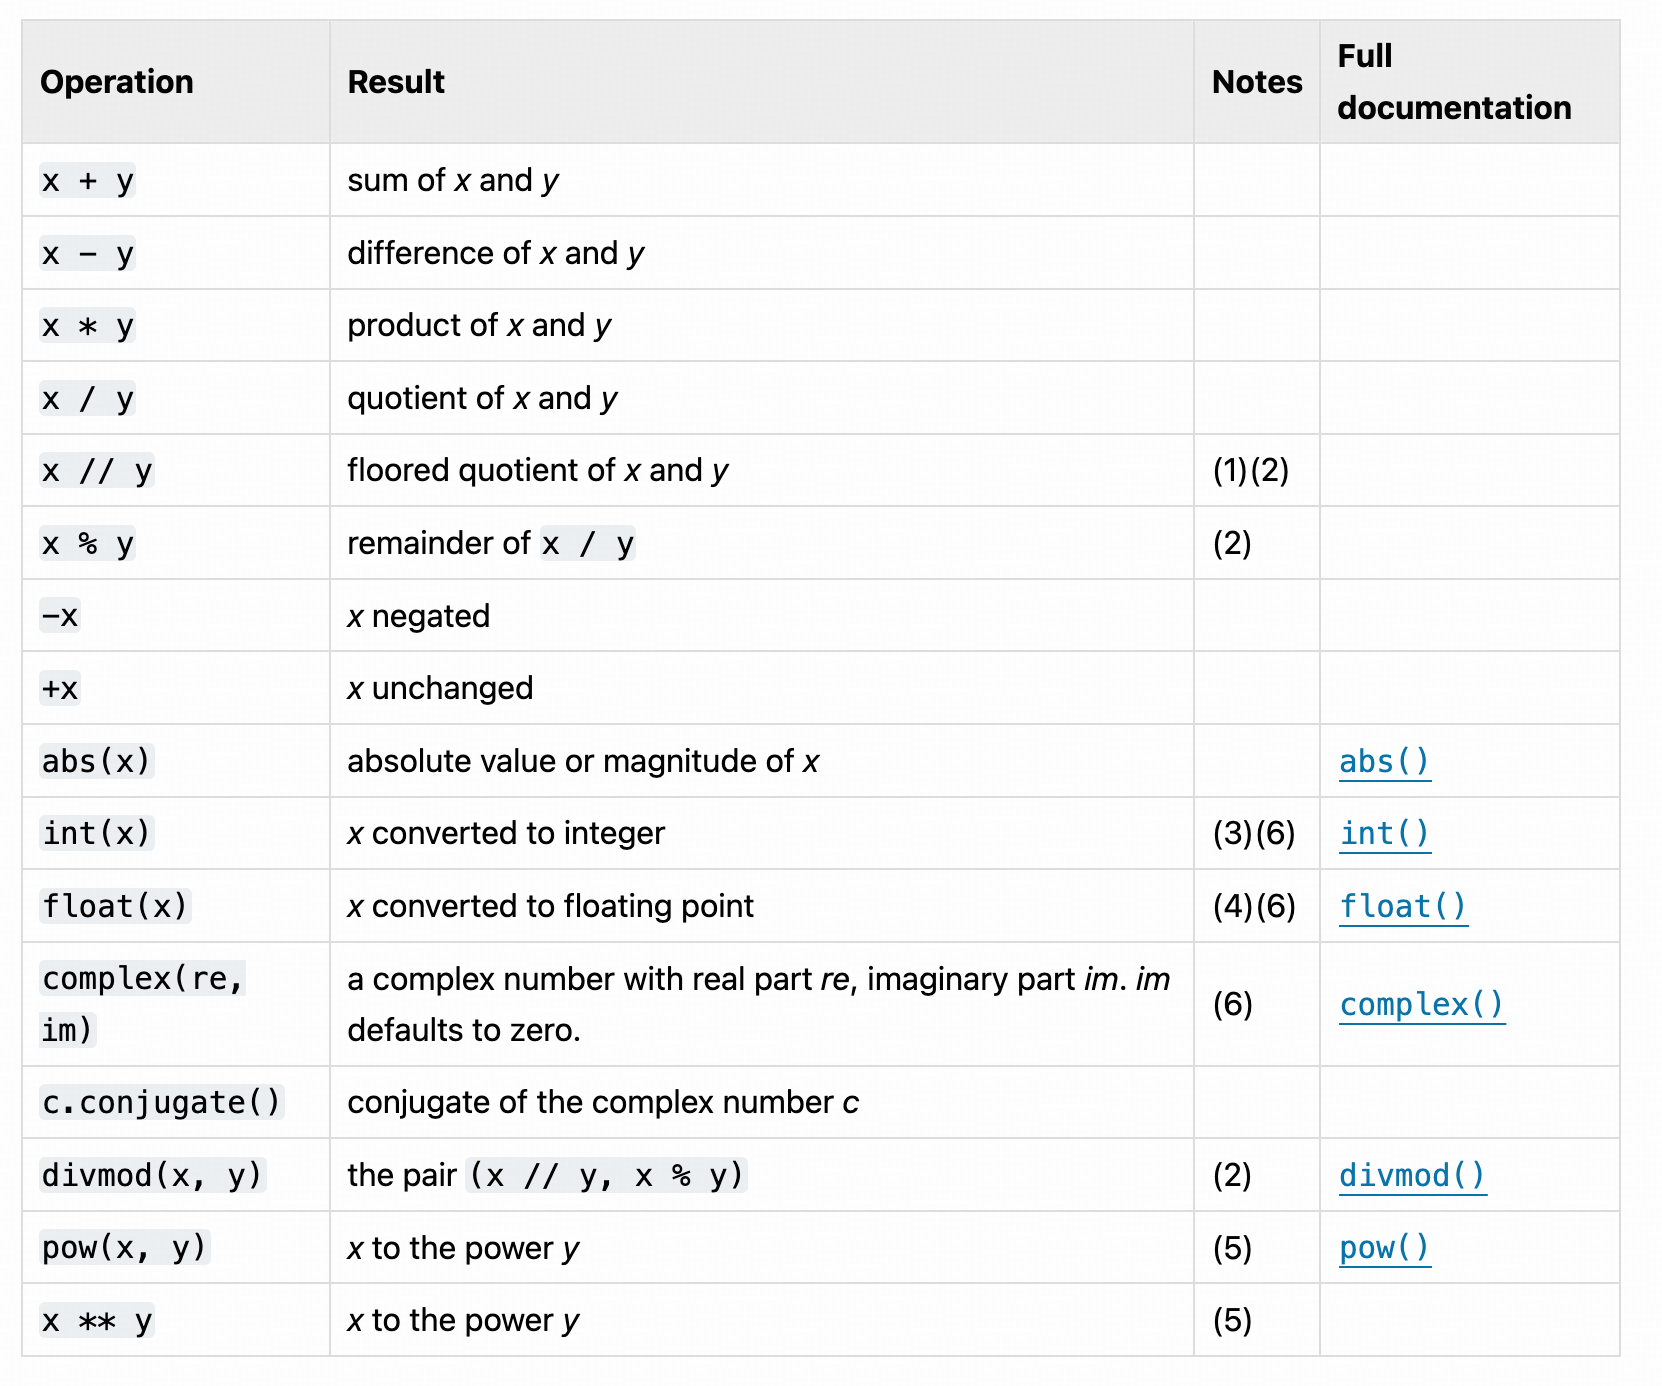

`int`类型非常简单，之前在介绍它的子类`bool`的时候基本上也都介绍到了。这里可以单独介绍一下它的字面量表达方法：

In [57]:
# 十进制
print(123, 1_000_000) # 可以使用下划线来分割，用户更加友好
# 二进制
print(0b1001, 0B1001_0100)
# 八进制
print(0b1001, 0B1100)
# 十六进制
print(0x1001, 0Xffff)

123 1000000
9 148
9 12
4097 65535


`float`类型也是类似的。

In [58]:
# 一般写法
print(1.1, 2., .3)
# 科学计数法
print(1e2, 1.1E-3)
# 特殊数值
print(float("inf"),float("-inf"), float("nan"))
# 16进制
print(2.11.hex())

1.1 2.0 0.3
100.0 0.0011
inf -inf nan
0x1.0e147ae147ae1p+1


Python的float默认是float64，也就是double，双精度浮点数：

In [59]:
import sys
print(sys.float_info.max)
print(sys.float_info.min)

1.7976931348623157e+308
2.2250738585072014e-308


如果需要更高的精度，可以使用`decimal`库中提供的数值类型（十进制精确运算）。如果需要低一些的精度（例如单精度浮点）就比较麻烦了：

|方法|适用场景|示例|
|--|--|--|
|numpy.float32|科学计算、数组操作|np.float32(3.14)|
|struct模块|二进制数据读写、C 交互|struct.pack('f', 3.14)|
|array 模块|高效存储单精度数组|array.array('f', [1.0, 2.0])|

`complex`类型用的不多。它重载了一些运算以符合数学上的复数运算：

In [60]:
1 + 2j, abs(1 + 2j), (1 + 2j).conjugate()

((1+2j), 2.23606797749979, (1-2j))

## 字典

字典可以说是除了字符串、列表外最重要的数据类型了。刷题必备的hashmap！


<details>
  <summary>dict的魔法方法</summary>

```
__class__
__class_getitem__
__contains__
__delattr__
__delitem__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__ior__
__iter__
__le__
__len__
__lt__
__ne__
__new__
__or__
__reduce__
__reduce_ex__
__repr__
__reversed__
__ror__
__setattr__
__setitem__
__sizeof__
__str__
__subclasshook__
```
</details>


字典是一种可变数据类型，他是不可hash的。

### 魔法方法

In [61]:
d = {"a": "apple", "b": "banana", "c": "cherry"}
another_d = {"a": "apple", "b": "blueberry"}

In [62]:
print(d["a"])  # __getitem__
d["d"] = "durian"  # 赋值更新，__setitem__
d

apple


{'a': 'apple', 'b': 'banana', 'c': 'cherry', 'd': 'durian'}

一个比较迷惑的操作是，dict实现了`|`运算，类似集合的并集运算（[PEP 584](https://peps.python.org/pep-0584/)）：

In [63]:
d | another_d, another_d | d # 当然他是非对称的，优先使用后面字典的键值对

({'a': 'apple', 'b': 'blueberry', 'c': 'cherry', 'd': 'durian'},
 {'a': 'apple', 'b': 'banana', 'c': 'cherry', 'd': 'durian'})

### 字典的更新

我们可以利用`|=`运算来更新字典：

In [64]:
d = {"a": "apple", "b": "banana", "c": "cherry"}
another_d = {"a": "apple", "b": "blueberry"}
d |= another_d
d

{'a': 'apple', 'b': 'blueberry', 'c': 'cherry'}

这个效果和`dict.update`是一致的。

In [65]:
d = {"a": "apple", "b": "banana", "c": "cherry"}
another_d = {"a": "apple", "b": "blueberry"}
d.update(another_d)
d

{'a': 'apple', 'b': 'blueberry', 'c': 'cherry'}

In [66]:
d.clear() # 清空字典
d

{}

### 字典默认值

我们可以在建立字典的时候就设定一个默认值：

In [67]:
dict.fromkeys("abcde", "unknown") # 这是一个classmethod

{'a': 'unknown',
 'b': 'unknown',
 'c': 'unknown',
 'd': 'unknown',
 'e': 'unknown'}

也可以在字典创建完了之后在设定默认值：

In [68]:
d = {"a": "apple"}
for key in "abcde":
    print(key, d.setdefault(key, None)) # 如果已经有值了就会返回该值
d

a apple
b None
c None
d None
e None


{'a': 'apple', 'b': None, 'c': None, 'd': None, 'e': None}

当然这两个做法都是建立在我们有了字典的keys的情况下，如果不知道字典会有什么keys，还想要默认值字典，可以使用标准库中的`collections.defaultdict`：

In [69]:
from collections import defaultdict

d = defaultdict(list)   # 默认是一个列表
d['b'].append("banana") # 不需要初始化就可以直接append
d

defaultdict(list, {'b': ['banana']})

### 遍历字典

In [70]:
d = {"a": "apple", "b": "banana", "c": "cherry"}

In [71]:
# 取值（不修改字典）
print(d.get("d", "durian"), d)  # 取键为d的值，没找到就返回durian
# 弹出
print(d.pop("b"), d)
# 弹出一个键值对（随机）
print(d.popitem(), d)

durian {'a': 'apple', 'b': 'banana', 'c': 'cherry'}
banana {'a': 'apple', 'c': 'cherry'}
('c', 'cherry') {'a': 'apple'}


In [72]:
d = {"a": "apple", "b": "banana", "c": "cherry"}

遍历keys：

In [73]:
[k for k in d], [k for k in d.keys()] # 这俩是一样的，默认情况下直接遍历字典就是按照key来遍历

(['a', 'b', 'c'], ['a', 'b', 'c'])

遍历values：

In [74]:
[v for v in d.values()]

['apple', 'banana', 'cherry']

遍历键值对：

In [75]:
[(k, v) for k, v in d.items()]

[('a', 'apple'), ('b', 'banana'), ('c', 'cherry')]

ok，到这里常用的数据类型就看完了。

果然每次看文档都能学到新的知识点😭

只能常看常新了。